In [141]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import re
import numpy as np
import networkx as nx
import seaborn as sns
from wordcloud import WordCloud
from itertools import combinations
from collections import Counter
from plotly.subplots import make_subplots

In [142]:
folder_path = '/Users/nemoby/Desktop/FA24-Data/final-project'
file_list = glob.glob(folder_path + '/*.xls')

In [143]:
#merge files and store as dataframe
merged_df = pd.DataFrame()

for file in file_list:
    df = pd.read_excel(file)
    merged_df = pd.concat([merged_df, df], ignore_index= True)

In [144]:
#drop NA and unnecessary columns
drop_columns = ['Book Authors', 'Book Editors',
       'Book Group Authors', 'Book Author Full Names',
       'Group Authors', 'Book Series Title',
       'Book Series Subtitle', 'Conference Title',
       'Conference Date', 'Conference Location', 'Conference Sponsor',
       'Conference Host', 'Cited References', 'ISBN', 'Part Number', 'Supplement',
       'Meeting Abstract', 'Start Page', 'End Page', 'Web of Science Record']
merged_df = merged_df.drop(columns = drop_columns)

In [145]:
merged_df.to_csv('complete_biblio.csv', index= False)

In [146]:
#two journals
yearly_pub = merged_df.groupby('Publication Year').size().reset_index(name = 'Number of Pubs')

In [147]:
fig1 = go.Figure()

fig1.add_trace(
    go.Bar(x=yearly_pub['Publication Year'], y=yearly_pub['Number of Pubs'], marker_color = '#367DB0', name='Number of Publications')
    )


fig1.add_trace(
    go.Scatter(x=yearly_pub['Publication Year'], y=yearly_pub['Number of Pubs'],
                         mode='lines', line=dict(color='#519D78'), name='Trendline')
                         )

fig1.update_layout(
    title='Annual Publication Trends',
    xaxis_title='Year',
    yaxis_title='Number of Publications',
)


fig1.show()

In [148]:
#CHB trends
yearly_pub_chb = merged_df[merged_df['Source Title'] == 'COMPUTERS IN HUMAN BEHAVIOR'].groupby('Publication Year').size().reset_index(name = 'Number of Pubs')

fig2 = go.Figure()
fig2.add_trace(go.Bar(x=yearly_pub_chb['Publication Year'], y=yearly_pub_chb['Number of Pubs'], name='Number of Publications', marker_color='#6CBAD8'))


fig2.add_trace(go.Scatter(x=yearly_pub_chb['Publication Year'], y=yearly_pub_chb['Number of Pubs'],
                         mode='lines', line=dict(color='#9ED17B'), name='Trendline'))

fig2.update_layout(
    title='Annual Publication Trends in COMPUTERS IN HUMAN BEHAVIOR',
    xaxis_title='Year',
    yaxis_title='Number of Publications',
)

fig2.show()

In [149]:
#HCS trends
yearly_pub_hcs = merged_df[merged_df['Source Title'] == 'INTERNATIONAL JOURNAL OF HUMAN-COMPUTER STUDIES'].groupby('Publication Year').size().reset_index(name = 'Number of Pubs')

fig3 = go.Figure()
fig3.add_trace(go.Bar(x=yearly_pub_hcs['Publication Year'], y=yearly_pub_hcs['Number of Pubs'], name='Number of Publications', marker_color='#96C2D4'))


fig3.add_trace(go.Scatter(x=yearly_pub_hcs['Publication Year'], y=yearly_pub_hcs['Number of Pubs'],
                         mode='lines', line=dict(color='#BFE8C1'), name='Trendline'))

fig3.update_layout(
    title='Annual Publication Trends in INTERNATIONAL JOURNAL OF HUMAN-COMPUTER STUDIES',
    xaxis_title='Year',
    yaxis_title='Number of Publications',
)


fig3.show()

In [150]:
hcs_count = len(merged_df[merged_df['Source Title'] == 'INTERNATIONAL JOURNAL OF HUMAN-COMPUTER STUDIES'])
chb_count = len(merged_df[merged_df['Source Title'] == 'COMPUTERS IN HUMAN BEHAVIOR'])

In [151]:
data = {
    'Journal': [
        'COMPUTERS IN HUMAN BEHAVIOR',
        'INTERNATIONAL JOURNAL OF HUMAN-COMPUTER STUDIES'
    ],
    'Publications': [
        chb_count,
        hcs_count
    ]
}

dis = pd.DataFrame(data)
fig4 = px.pie(dis, values='Publications', names='Journal', title='Publication Volume by Journal',
              color_discrete_sequence=['#9BC7DF','#8BCF8B'])


fig4.show()

In [152]:
fig5 = go.Figure()


fig5.add_trace(
    go.Bar(x=yearly_pub['Publication Year'], y=yearly_pub['Number of Pubs'], 
           marker_color='#367DB0', name='Number of Publications - Total')
)
fig5.add_trace(
    go.Scatter(x=yearly_pub['Publication Year'], y=yearly_pub['Number of Pubs'],
               mode='lines', line=dict(color='#519D78'), name='Trendline - Total')
)


fig5.add_trace(
    go.Bar(x=yearly_pub_chb['Publication Year'], y=yearly_pub_chb['Number of Pubs'], 
           marker_color='#6CBAD8', name='Number of Publications - CHB', visible=False)
)
fig5.add_trace(
    go.Scatter(x=yearly_pub_chb['Publication Year'], y=yearly_pub_chb['Number of Pubs'],
               mode='lines', line=dict(color='#9ED17B'), name='Trendline - CHB', visible=False)
)


fig5.add_trace(
    go.Bar(x=yearly_pub_hcs['Publication Year'], y=yearly_pub_hcs['Number of Pubs'], 
           marker_color='#96C2D4', name='Number of Publications - HCS', visible=False)
)
fig5.add_trace(
    go.Scatter(x=yearly_pub_hcs['Publication Year'], y=yearly_pub_hcs['Number of Pubs'],
               mode='lines', line=dict(color='#BFE8C1'), name='Trendline - HCS', visible=False)
)


updatemenus = [
    dict(
        buttons=list([
            dict(label="Total",
                 method="update",
                 args=[{"visible": [True, True, False, False, False, False]},
                       {"title": "Annual Publication Trends - Total"}]),
            dict(label="CHB",
                 method="update",
                 args=[{"visible": [False, False, True, True, False, False]},
                       {"title": "Annual Publication Trends in COMPUTERS IN HUMAN BEHAVIOR"}]),
            dict(label="HCS",
                 method="update",
                 args=[{"visible": [False, False, False, False, True, True]},
                       {"title": "Annual Publication Trends in INTERNATIONAL JOURNAL OF HUMAN-COMPUTER STUDIES"}])
        ]),
        direction="down",
        pad={"r": 10, "t": 10},
        showactive=True,
        x=1,
        xanchor="left",
        y=1.2,
        yanchor="top"
    )
]

# 更新布局
fig5.update_layout(
    title="Annual Publication Trends - Total",
    xaxis_title='Year',
    yaxis_title='Number of Publications',
    updatemenus=updatemenus
)

fig5.show()

In [153]:
merged_df['Addresses'].isna().sum()

np.int64(394)

In [154]:
#because there're na values in Addresses, so I created new df with dropping na values
df_countries = merged_df.dropna(subset=['Addresses'])
df_countries['Addresses'].isna().sum()

np.int64(0)

#countries distribution
#extract countries data and get first author country
df_countries['Countries'] = df_countries['Addresses'].apply(
    lambda x: re.findall(r'\b[A-Za-z ]+\b(?=;|$)', re.sub(r'\[[^\]]*\]', '', x))
)
len(df_countries)

In [155]:
#only keep first author country
df_countries['Countries'] = df_countries['Addresses'].apply(
    lambda x: re.search(r'\b[A-Za-z ]+\b(?=;|$)', re.sub(r'\[[^\]]*\]', '', x)).group(0)
    if re.search(r'\b[A-Za-z ]+\b(?=;|$)', re.sub(r'\[[^\]]*\]', '', x)) else None
)
len(df_countries)

/var/folders/kc/p5c1tfmn5270xpvhdx4gpklw0000gn/T/ipykernel_2520/2968482853.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



10195

In [156]:
#all_countries = df_countries['Countries'].explode()
all_countries = df_countries['Countries']
#lower case
all_countries = all_countries.str.lower()
#drop na values
all_countries.dropna(inplace=True)

In [157]:
len(all_countries)

10094

In [ ]:
all_countries = all_countries.apply(lambda x: 'usa' if 'usa' in x else x)
#px locationmode can't identify england so change them to united kingdom
all_countries= all_countries.apply(
    lambda x: 'united kingdom' if 'england' in x.lower() else x)

country_count = all_countries.value_counts()
#country_count.to_csv('country_list.csv')
#country_count

In [159]:
fig6 = px.choropleth(country_count,
                     locations= country_count.index,
                     locationmode='country names',
                     color= country_count.values,
                     color_continuous_scale=px.colors.sequential.YlGnBu,
                     range_color=(0,1000),
                     projection='natural earth',
                     title='Global Distribution of Publications by Country'
                     )


fig6.update_layout(height = 600, geo=dict(showcountries=True, showcoastlines = True
                                          ))
fig6.show()

In [206]:
#df_countries.head()

In [160]:
df_countries_2 = df_countries
#df_countries_2['Countries'] = df_countries_2['Countries'].str.lower()
#df_countries_2['Countries'] = df_countries_2['Countries'].apply(lambda x: 'usa' if 'usa' in x else x)
df_countries_2.dropna(subset='Countries', inplace=True)
#df_countries_2

/var/folders/kc/p5c1tfmn5270xpvhdx4gpklw0000gn/T/ipykernel_2520/1492839542.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
yearly_pub_2 = df_countries_2.groupby(['Publication Year','Countries']).size().reset_index(name='Number of Pubs')

In [162]:
pubs_by_countries = df_countries_2.groupby('Countries').size().reset_index(name='Number of Pubs')

In [163]:
top5_countries = pubs_by_countries.sort_values(by='Number of Pubs',ascending=False).head(5)['Countries']
top5_countries

0                  USA
103    Peoples R China
31             England
40             Germany
132             Taiwan
Name: Countries, dtype: object

In [164]:
#countries out of top 5 are marked as other
df_countries_2['Modified Countries'] = df_countries_2['Countries'].apply(
    lambda x: x if x in top5_countries.values else 'Other'
)

/var/folders/kc/p5c1tfmn5270xpvhdx4gpklw0000gn/T/ipykernel_2520/1476495950.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [165]:
#order adjustment for figure
yearly_pub_2 = df_countries_2.groupby(['Publication Year','Modified Countries']).size().reset_index(name='Number of Pubs')
other_data = yearly_pub_2[yearly_pub_2['Modified Countries'] == 'Other']
non_other_data = yearly_pub_2[yearly_pub_2['Modified Countries'] != 'Other']
non_other_data = non_other_data.sort_values(by='Number of Pubs', ascending=False)
final_data = pd.concat([non_other_data, other_data])

In [166]:
fig7 = px.bar(final_data,
             x='Publication Year',
             y='Number of Pubs',
             color = 'Modified Countries',
             title='Annual Publication Trend by Countries',
             barmode='stack',
             color_discrete_map={'Other': 'grey'})
fig7.show()

In [167]:
merged_df['Authors List'] = merged_df['Author Full Names'].apply(lambda x: x.split('; '))
merged_df['Keywords List'] = merged_df['Author Keywords'].apply(lambda x: [kw.strip().lower() for kw in str(x).split('; ')] if pd.notnull(x) else [])

In [168]:
#top30 authors by number of pubs
all_authors = merged_df.explode('Authors List')
top30_authors = all_authors['Authors List'].value_counts().head(30) 
top30_authors.index

Index(['Guitton, Matthieu J.', 'Griffiths, Mark D.', 'Kirschner, Paul A.',
       'Hamari, Juho', 'Sundar, S. Shyam', 'Drouin, Michelle', 'Jou, Min',
       'Amichai-Hamburger, Yair', 'Yen, David C.', 'Kaye, Linda K.',
       'Chittaro, Luca', 'Spence, Patric R.', 'Song, Hayeon',
       'Mayer, Richard E.', 'Valkenburg, Patti M.',
       'Ordonez de Pablos, Patricia', 'Hwang, Yujong', 'Lee, Kun Chang',
       'Opwis, Klaus', 'King, Daniel L.', 'Kraemer, Nicole C.',
       'Rau, Pei-Luen Patrick', 'Goncalves, Jorge', 'Billieux, Joel',
       'Shin, Dong-Hee', 'Oliveira, Tiago', 'Park, Namkee', 'Tsai, Chin-Chung',
       'Peter, Jochen', 'Wu, Yen-Chun Jim'],
      dtype='object', name='Authors List')

In [169]:
fig8 = go.Figure(data=[
    go.Bar(x=top30_authors.index, y=top30_authors.values, marker_color='#9DC7DD')
])

fig8.update_layout(
    title='Top 30 Authors by Publication Number',
    xaxis_title='Author Name',
    yaxis_title='Number of Publications',
    
)

# 显示图表
fig8.show()

In [170]:
#fill NA value to avoid errors in next steps
merged_df['Addresses'] = merged_df['Addresses'].fillna('No Addresses Provided')

In [171]:
#example: [Jahromi, Reza G.; Lavasani, Masoud G.] Univ Tehran, Fac Psychol, Tehran 14174, Iran; 
#[Rastegar, Ahmad; Mooghali, Alireza] Payame Noor Univ, Cent Off, Shiraz, Iran
#author names in brackets followed by affiliation
#I also want to extract affiliations of top30 authors, so I need to match author name in addresses column
def extract_affiliation(author_info):
    
    pattern = r'\[(.*?)\] (.*?)(?=;|\Z)'
    matches = re.findall(pattern, author_info)
    result = []
    for match in matches:
        authors, affiliation = match
      
        authors_list = authors.split('; ')
        for author in authors_list:
            
            result.append((author.strip(), affiliation.strip()))
    return result

def extract_affiliation_details(affiliation):
    parts = affiliation.split(', ')
    institution = parts[0]
    if len(parts) >= 3:
        city = parts[-2]
        country = parts[-1]
    else:
        city = ''
        country = ''
    return institution, city, country

author_affiliations = {}
top_authors = top30_authors.index

for index, row in merged_df.iterrows():
    author_infos = row['Addresses'].split('; ')
    for author_info in author_infos:
        authors = extract_affiliation(author_info)
        for author, affiliation in authors:
            if author in top30_authors:
                institution, city, country = extract_affiliation_details(affiliation)
                author_affiliations.setdefault(author, []).append((institution, city, country))

info = {'Author': [], 'Institution': [], 'City': [], 'Country': []}
for author, affiliations in author_affiliations.items():
    for institution, city, country in affiliations:
        info['Author'].append(author)
        info['Institution'].append(institution)
        info['City'].append(city)
        info['Country'].append(country)

author_info = pd.DataFrame(info)
#author_info

In [172]:
#Some authors have multiple affiliations, and I keep the first one for further analysis
author_info = author_info.drop_duplicates(subset= 'Author', keep='first')
#I don't further need City info so drop the column
author_info = author_info.drop(['City'], axis=1)

In [173]:
#remove unnecessary info in the unit of country
author_info['Country'] = author_info['Country'].apply(lambda x: x.split()[-1])

In [174]:
#add columns of number of pubs
top30_authors_df = top30_authors.reset_index()
top30_authors_df.columns = ['Author', 'Number of Pubs']
author_info = author_info.merge(top30_authors_df, on='Author', how = 'left')
#author_info

In [175]:
#no idea why lack three author among top30, so I add the info manually
lack_authors = [{'Author': 'Opwis, Klaus','Institution':'Univ Basel', 'Country': 'Switzerland', 'Number of Pubs':16},
                {'Author': 'Rau, Pei-Luen Patrick','Institution':'Tsinghua Univ', 'Country':'China' , 'Number of Pubs':15},
                {'Author': 'Peter, Jochen','Institution':'Univ Amsterdam', 'Country': 'Netherlands', 'Number of Pubs':14}]
lack_authors_df = pd.DataFrame(lack_authors)
author_info = pd.concat([lack_authors_df, author_info], ignore_index=True)
author_info = author_info.sort_values(by='Number of Pubs', ascending=False)
author_info = author_info.reset_index(drop=True)
author_info

,Author,Institution,Country,Number of Pubs
0,"Guitton, Matthieu J.",Univ Laval,Canada,33
1,"Kirschner, Paul A.",Open Univ Netherlands,Netherlands,29
2,"Griffiths, Mark D.",Nottingham Trent Univ,England,29
3,"Hamari, Juho",Tampere Univ,Finland,28
4,"Sundar, S. Shyam",Penn State Univ,USA,27
5,"Drouin, Michelle",Purdue Univ Ft Wayne,USA,21
6,"Jou, Min",Natl Taiwan Normal Univ,Taiwan,20
7,"Amichai-Hamburger, Yair",Interdisciplinary Ctr IDC,Israel,19
8,"Yen, David C.",SUNY Coll Oneonta,USA,19
9,"Kaye, Linda K.",Edge Hill Univ,England,18


In [176]:
fig9 = px.bar(author_info, x='Author', y='Number of Pubs', 
              color='Country', title = 'Top 30 Authors by Publication Number',
              category_orders={'Author': author_info['Author'].tolist()}
             )
fig9.show()

In [177]:
#top 30 affiliations by number of pubs
merged_df['Affiliations List'] = merged_df['Affiliations'].apply(lambda x: x.split('; ') if pd.notnull(x) else [])
all_affiliations = merged_df.explode('Affiliations List')
top30_affiliations = all_affiliations['Affiliations List'].value_counts().head(30) 
#top30_affiliations.index

In [178]:
fig10 = go.Figure(data=[
    go.Bar(x=top30_affiliations.index, y=top30_affiliations.values,marker_color ='#9ED17B')
])

fig10.update_layout(
    title='Top 30 Affiliations by Publication Number',
    xaxis_title='Affiliation',
    yaxis_title='Number of Publications',
    xaxis_tickangle= 35
)

fig10.show()

In [ ]:
#top30_affiliations.to_csv('top30_aff.csv')

In [179]:
#manually add state info for map visualization
top30_us = pd.read_csv('top30_aff.csv')
top30_us.dropna(subset='Location',inplace=True)
top30_us

,Affiliations List,count,Location
0,University System of Ohio,266,OH
1,State University System of Florida,265,FL
2,Pennsylvania Commonwealth System of Higher Edu...,219,PA
3,University of California System,196,CA
5,University of Texas System,164,TX
6,Pennsylvania State University,164,PA
7,Michigan State University,153,MI
8,University System of Georgia,125,GA
11,University of Wisconsin System,117,WI
13,Pennsylvania State University - University Park,114,PA


In [180]:
#make sure all affiliations in a state could be showed
top30_us['Affiliations List'] = top30_us.groupby('Location')['Affiliations List'].transform(lambda x: ', '.join(x))
top30_us = top30_us.groupby('Location').agg({'count': 'sum', 'Affiliations List': 'first'}).reset_index()

fig11 = px.choropleth(top30_us,
                     locations='Location',  
                     locationmode='USA-states', 
                     color='count',
                     scope="usa",  
                     hover_name='Affiliations List',  
                     color_continuous_scale=px.colors.sequential.YlGnBu,
                    
                     title="US Affiliations among Top 30 by State")  

fig11.show()

In [181]:
selected_df = merged_df[['Author Full Names','Publication Year','Article Title', 'Author Keywords', 'Keywords Plus', 'Times Cited, All Databases',
                         'Authors List', 'Keywords List','Affiliations List']]

In [182]:
#top 50 cited paper all over the time
top50_papers = selected_df.sort_values('Times Cited, All Databases', ascending=False).head(50)
#top50_papers.head()

In [183]:
fig12 = px.bar(top50_papers, x='Article Title', y='Times Cited, All Databases',
             title='Top 50 Most Cited Papers', color = 'Publication Year',
            
             labels={'Article Title': 'Article Title', 'Times Cited, All Databases': 'Times Cited'})
fig12.show()

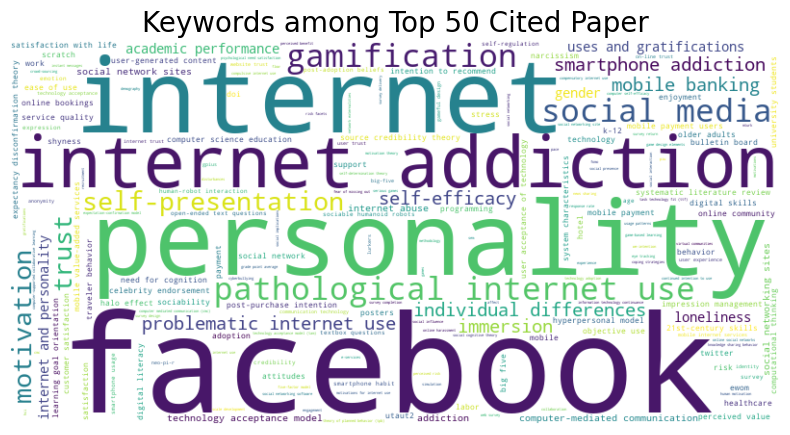

In [184]:
#keywords in top 50 papers
alltime_top50p_keywords = top50_papers.explode('Keywords List')
alltime_top50p_kw = alltime_top50p_keywords['Keywords List'].value_counts()
#alltime_top50p_kw
def generate_wordcloud(data, title):
    
    wc = WordCloud(width=800, height=400, background_color='white')
    
    
    words = dict(zip(data.index, data.values))
    wc.generate_from_frequencies(words)
    
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis("off")
    plt.show()


generate_wordcloud(alltime_top50p_kw, "Keywords among Top 50 Cited Paper")

In [ ]:
#function for vosviewer just in case
def export_to_net_file(G, filename="network.net"):
    with open(filename, "w") as file:
        file.write(f"*Vertices {G.number_of_nodes()}\n")
        id_map = {node: i+1 for i, node in enumerate(G.nodes())}
        for node, id in id_map.items():
            file.write(f"{id} \"{node}\"\n")
        
        file.write("*Edges\n")
        for u, v, data in G.edges(data=True):
            file.write(f"{id_map[u]} {id_map[v]} {data['weight']}\n")

In [ ]:
G6 = nx.Graph()

for keywords in top50_papers['Keywords List']:
    for (kw1, kw2) in combinations(keywords, 2):
        if G6.has_edge(kw1, kw2):
            G6[kw1][kw2]['weight'] += 1
        else:
            G6.add_edge(kw1, kw2, weight=1)

print(f"Number of nodes: {G6.number_of_nodes()}")
print(f"Number of edges: {G6.number_of_edges()}")

#export_to_net_file(G6)
#nx.write_graphml(G6,'top50cited_kw_graph.graphml')


Number of nodes: 196
Number of edges: 536


![top50cited_kw_network](/Users/nemoby/Desktop/FA24-Data/final-project/top50cited_kw_network.png)

In [185]:
#top30 cited papers after 2015
papers_after2015 = selected_df[selected_df['Publication Year'] >= 2015]
top50_papers_after2015 = papers_after2015.sort_values('Times Cited, All Databases', ascending=False).head(50)
fig13 = px.bar(top50_papers_after2015, x='Article Title', y='Times Cited, All Databases',
             title='Top 50 Most Cited Papers Published After 2015', color = 'Publication Year',
             labels={'Article Title': 'Article Title', 'Times Cited, All Databases': 'Times Cited'})

fig13.show()

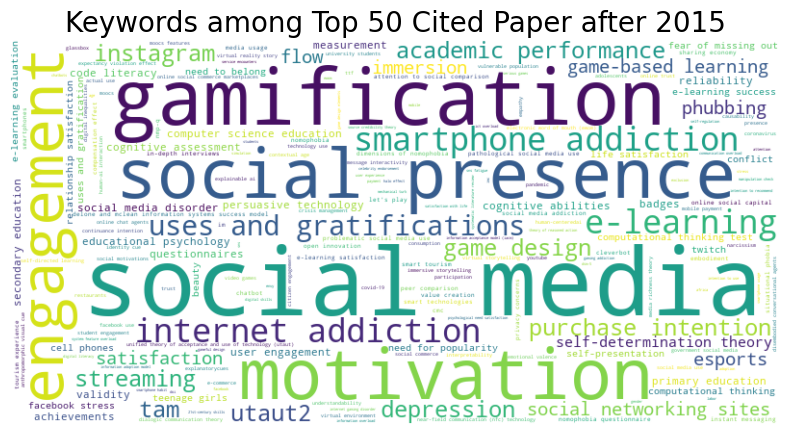

In [186]:
after15_top50p_keywords = top50_papers_after2015.explode('Keywords List')
after15_top50p_kw = after15_top50p_keywords['Keywords List'].value_counts()
generate_wordcloud(after15_top50p_kw, "Keywords among Top 50 Cited Paper after 2015")

In [ ]:
G7 = nx.Graph()

for keywords in top50_papers_after2015['Keywords List']:
    for (kw1, kw2) in combinations(keywords, 2):
        if G7.has_edge(kw1, kw2):
            G7[kw1][kw2]['weight'] += 1
        else:
            G7.add_edge(kw1, kw2, weight=1)

print(f"Number of nodes: {G7.number_of_nodes()}")
print(f"Number of edges: {G7.number_of_edges()}")

#export_to_net_file(G7)
#nx.write_graphml(G7,'top50cited_kw_after15_graph.graphml')

Number of nodes: 231
Number of edges: 652


![top50cited_kw_after14_network](/Users/nemoby/Desktop/FA24-Data/final-project/top50cited_kw_after15_network.png)

In [187]:
#Top keywords by frequency
all_keywords = selected_df.explode('Keywords List')
all_time_top30_kw = all_keywords['Keywords List'].value_counts().head(30) 
kw_90s = all_keywords[(all_keywords['Publication Year'] >= 1990) & (all_keywords['Publication Year'] <=1999)]
kw_90s_top30 = kw_90s['Keywords List'].value_counts().head(30) 
kw_00s = all_keywords[(all_keywords['Publication Year'] >= 2000) & (all_keywords['Publication Year'] <= 2009)]
kw_00s_top30 = kw_00s['Keywords List'].value_counts().head(30)
kw_10s = all_keywords[(all_keywords['Publication Year'] >= 2010) & (all_keywords['Publication Year'] <= 2019)]
kw_10s_top30 = kw_10s['Keywords List'].value_counts().head(30)
kw_20s = all_keywords[(all_keywords['Publication Year'] >= 2020) & (all_keywords['Publication Year'] <= 2025)]
kw_20s_top30 = kw_20s['Keywords List'].value_counts().head(30)

In [188]:
time_periods_data = [
    ("All Time", all_time_top30_kw),
    ("1990-1999", kw_90s_top30),
    ("2000-2009", kw_00s_top30),
    ("2010-2019", kw_10s_top30),
    ("2020-Present", kw_20s_top30)
]

for label, data in time_periods_data:
    fig = go.Figure() 
    fig.add_trace(
        go.Bar(
            x=data.values,
            y=data.index,
            orientation='h',  
            marker_color='#3492B2'  
        )
    )
    
    
    fig.update_layout(
        title=f"Top 30 Keywords: {label}",
        xaxis_title="Frequency",
        yaxis_title="Keywords",
        yaxis=dict(categoryorder='total ascending'),
        autosize=False,
        width=800,  
        height=600  
    )
    
    fig.show()  

In [ ]:
#keyword proportion im interested in over decades
#843 paper in 90s
df_90s = selected_df[(selected_df['Publication Year'] >= 2010) & (selected_df['Publication Year'] <=2019)]
print(len(df_90s))
#4 cmc
print(kw_90s['Keywords List'].apply(lambda x: x == 'computer-mediated communication' in x if isinstance(x, str) else False).sum())
#0 social media
print(kw_90s['Keywords List'].apply(lambda x: x == 'social media' in x if isinstance(x, str) else False).sum())
#1 virtual reality
print(kw_90s['Keywords List'].apply(lambda x: x == 'virtual reality' in x if isinstance(x, str) else False).sum())
#1 hci
print(kw_90s['Keywords List'].apply(lambda x: x == 'human-computer interaction' in x if isinstance(x, str) else False).sum())

#1619 paper in 00s
df_00s = selected_df[(selected_df['Publication Year'] >= 2000) & (selected_df['Publication Year'] <=2009)]
print(len(df_00s))
#41 cmc
print(kw_00s['Keywords List'].apply(lambda x: x == 'computer-mediated communication' in x if isinstance(x, str) else False).sum())
#2 social media
print(kw_00s['Keywords List'].apply(lambda x: x == 'social media' in x if isinstance(x, str) else False).sum())
#20 virtual reality
print(kw_00s['Keywords List'].apply(lambda x: x == 'virtual reality' in x if isinstance(x, str) else False).sum())
#38 hci
print(kw_00s['Keywords List'].apply(lambda x: x == 'human-computer interaction' in x if isinstance(x, str) else False).sum())

#5673 paper in 10s
df_10s = selected_df[(selected_df['Publication Year'] >= 2010) & (selected_df['Publication Year'] <=2019)]
print(len(df_10s))
#99 cmc
print(kw_10s['Keywords List'].apply(lambda x: x == 'computer-mediated communication' in x if isinstance(x, str) else False).sum())
#396 social media
print(kw_10s['Keywords List'].apply(lambda x: x == 'social media' in x if isinstance(x, str) else False).sum())
#75 virtual reality
print(kw_10s['Keywords List'].apply(lambda x: x == 'virtual reality' in x if isinstance(x, str) else False).sum())
#70 hci
print(kw_10s['Keywords List'].apply(lambda x: x == 'human-computer interaction' in x if isinstance(x, str) else False).sum())

#2454 paper in 20s
df_20s = selected_df[selected_df['Publication Year'] >= 2020]
print(len(df_20s))
#10 cmc
print(kw_20s['Keywords List'].apply(lambda x: x == 'computer-mediated communication' in x if isinstance(x, str) else False).sum())
#173 social media
print(kw_20s['Keywords List'].apply(lambda x: x == 'social media' in x if isinstance(x, str) else False).sum())
#94 virtual reality
print(kw_20s['Keywords List'].apply(lambda x: x == 'virtual reality' in x if isinstance(x, str) else False).sum())
#43 hci
print(kw_20s['Keywords List'].apply(lambda x: x == 'human-computer interaction' in x if isinstance(x, str) else False).sum())


In [190]:
topkw_data = {
    'Decade': ['90s','90s','90s','90s','00s', '00s', '00s', '00s', '10s', '10s', '10s', '10s', '20s', '20s', '20s', '20s'],
    'Keyword': ['computer-mediated communication', 'social media', 'virtual reality', 'human-computer interaction',
                'computer-mediated communication', 'social media', 'virtual reality', 'human-computer interaction',
                'computer-mediated communication', 'social media', 'virtual reality', 'human-computer interaction',
                'computer-mediated communication', 'social media', 'virtual reality', 'human-computer interaction'],
    'Count': [4, 0,1 ,1, 41, 2, 20, 38, 99, 396, 75, 70, 10, 173, 94, 43]
}
number_of_papers = {'90s': 843, '00s':1619, '10s':5673,'20s':2454}

kw_decade = pd.DataFrame(topkw_data)

kw_decade['Total Papers'] = kw_decade['Decade'].map(number_of_papers)
kw_decade['Proportion (%)'] = (kw_decade['Count']/kw_decade['Total Papers']) * 100

fig17 = go.Figure()

for keyword in kw_decade['Keyword'].unique():
    subset = kw_decade[kw_decade['Keyword'] == keyword]
    fig17.add_trace(go.Scatter(x=subset['Decade'], y=subset['Proportion (%)'], mode='lines+markers', name=keyword))

fig17.update_layout(
    title='Top Keyword Proportions by Decade',
    xaxis_title='Decade',
    yaxis_title='Proportion (%)',
    yaxis=dict(tickformat=".2f")
)

fig17.show()

In [131]:
#add dropdown menu but no idea why it didn't show
time_periods_data = [
    ("All Time", all_time_top30_kw),
    ("1990-1999", kw_90s_top30),
    ("2000-2009", kw_00s_top30),
    ("2010-2019", kw_10s_top30),
    ("2020-Present", kw_20s_top30)
]


fig18 = go.Figure()


for label, data in time_periods_data:
    fig18.add_trace(
        go.Bar(
            x=data.values,
            y=data.index,
            orientation='h',
            marker_color='rgb(58,200,225)',
            name=label,
            visible=True if label == "All Time" else False  
        )
    )


buttons = []
for i, (label, _) in enumerate(time_periods_data):
    button = dict(
        method='update',
        args=[{'visible': [j == i for j in range(len(time_periods_data))]},  
              {'title': f'Top 30 Keywords: {label}'}],  
        label=label
    )
    buttons.append(button)


fig18.update_layout(
    updatemenus=[{
        'buttons': buttons,
        'direction': 'down',
        'pad': {"r": 10, "t": 10},
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.15,
        'yanchor': 'top'
    }],
    title="Top 30 Keywords: All Time",  
    xaxis_title="Frequency",
    yaxis_title="Keywords",
    yaxis=dict(categoryorder='total ascending'),
    autosize=False,
    width=800,
    height=600
)

fig18.show()

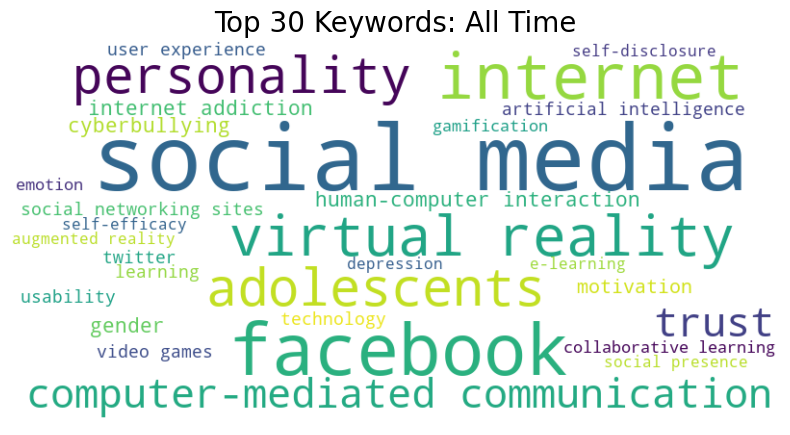

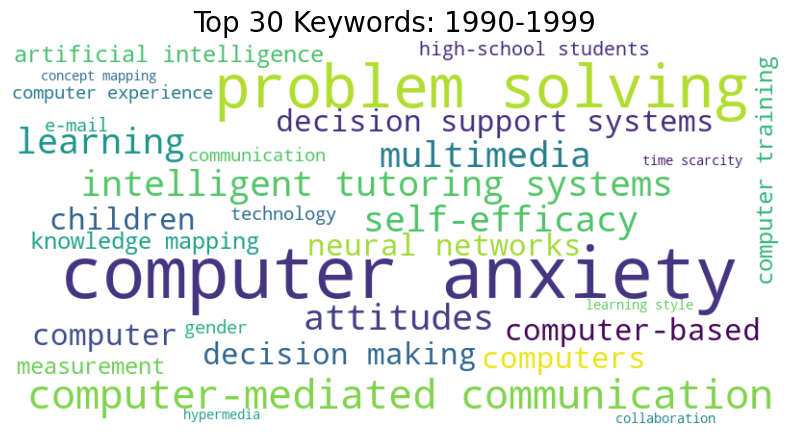

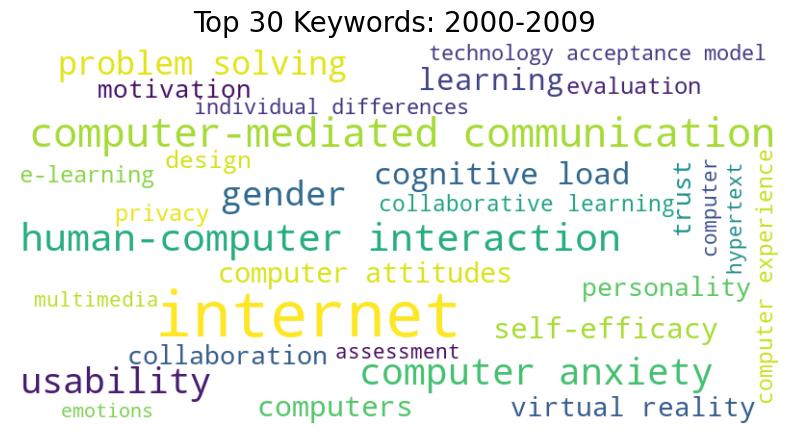

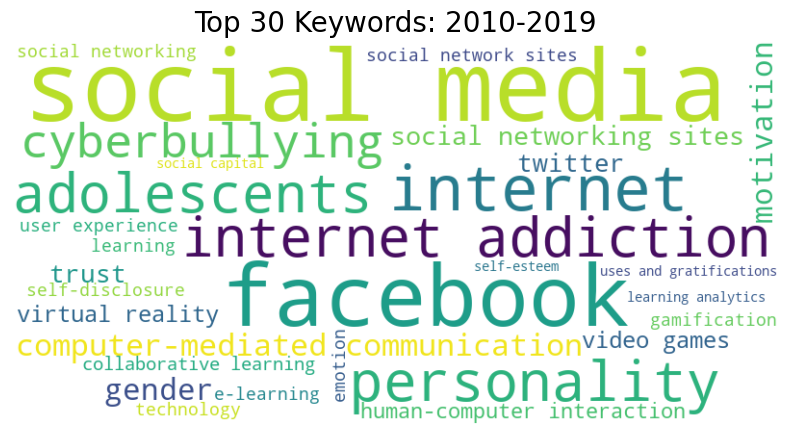

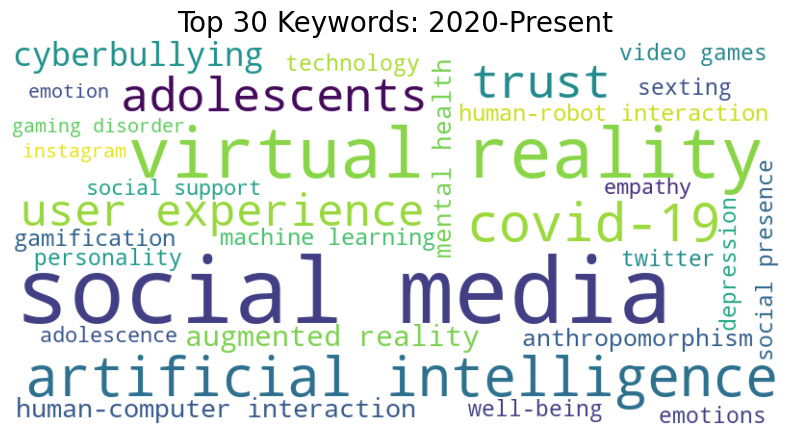

In [191]:
#create wordcloud based on top keywords
def generate_wordcloud(data, title):
    
    wc = WordCloud(width=800, height=400, background_color='white')
    
    
    words = dict(zip(data.index, data.values))
    wc.generate_from_frequencies(words)
    
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, size=20)
    plt.axis("off")
    plt.show()

for label, data in time_periods_data:
    generate_wordcloud(data, f"Top 30 Keywords: {label}")

In [192]:
author_counts = Counter()
selected_df['Authors List'].apply(lambda authors: author_counts.update([author.strip() for author in authors]))
len(author_counts)

24177

In [68]:
#co-authorship
G = nx.Graph()

for authors in selected_df['Authors List']:
        if len(authors) > 1:
            G.add_nodes_from(authors)
            G.add_edges_from((authors[i], authors[j]) for i in range(len(authors)) for j in range(i + 1, len(authors)))

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

nx.write_graphml(G,'coauthorship_graph.graphml')

#plt.figure(figsize=(10, 8))  

#pos = nx.spring_layout(G, iterations= 50)  
#nx.draw(G, pos, with_labels=True, node_color='skyblue', 
#        node_size=5000, edge_color='gray', linewidths=2, font_size=12)


#plt.title("Co-Authorship Graph")
#plt.show()

Number of nodes: 23504
Number of edges: 48103


In [193]:
top100_papers = selected_df.sort_values('Times Cited, All Databases', ascending=False).head(100)

In [70]:
#top 100 co-word 
G5 = nx.Graph()

for keywords in top100_papers['Keywords List']:
    for (kw1, kw2) in combinations(keywords, 2):
        if G5.has_edge(kw1, kw2):
            G5[kw1][kw2]['weight'] += 1
        else:
            G5.add_edge(kw1, kw2, weight=1)

print(f"Number of nodes: {G5.number_of_nodes()}")
print(f"Number of edges: {G5.number_of_edges()}")

#for vosviewer
#export_to_net_file(G5)
#plt.figure(figsize=(10, 8))
#pos = nx.spring_layout(G2, k=0.15, iterations=50)  
#nx.draw_networkx(G2, pos, node_size=2000, node_color='lightblue', with_labels=True, font_weight='bold', edge_color='#FF6F61')
#labels = nx.get_edge_attributes(G2, 'weight')
#nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
#plt.title('Co-word Network of Author Keywords')
#plt.show()
nx.write_graphml(G5,'top100_co-keywords_graph.graphml')

Number of nodes: 357
Number of edges: 1021


In [72]:
#co-word 
G2 = nx.Graph()

for keywords in selected_df['Keywords List']:
    for (kw1, kw2) in combinations(keywords, 2):
        if G2.has_edge(kw1, kw2):
            G2[kw1][kw2]['weight'] += 1
        else:
            G2.add_edge(kw1, kw2, weight=1)

print(f"Number of nodes: {G2.number_of_nodes()}")
print(f"Number of edges: {G2.number_of_edges()}")

#plt.figure(figsize=(10, 8))
#pos = nx.spring_layout(G2, k=0.15, iterations=50)  
#nx.draw_networkx(G2, pos, node_size=2000, node_color='lightblue', with_labels=True, font_weight='bold', edge_color='#FF6F61')
#labels = nx.get_edge_attributes(G2, 'weight')
#nx.draw_networkx_edge_labels(G2, pos, edge_labels=labels)
#plt.title('Co-word Network of Author Keywords')
#plt.show()
nx.write_graphml(G2,'co-keywords_graph.graphml')
#export_to_net_file(G2)

Number of nodes: 20806
Number of edges: 98560


In [194]:
#filter out vr studies
vr_check = merged_df['Keywords List'].apply(lambda keywords_list: any ('virtual reality' in str
                                         (keyword).lower() for keyword in keywords_list))
vr_df = merged_df[vr_check]

In [195]:
vr_yearly_pub = vr_df.groupby('Publication Year').size().reset_index(name = 'Number of Pubs')
vr_yearly_pub.head()

,Publication Year,Number of Pubs
0,1998,1
1,2001,2
2,2003,1
3,2005,2
4,2006,3


In [196]:
#VR publication trends
fig14 = go.Figure()

fig14.add_trace(
    go.Bar(x=vr_yearly_pub['Publication Year'], y=vr_yearly_pub['Number of Pubs'], marker_color = '#58B8D1', name='Number of Publications')
    )


fig14.add_trace(
    go.Scatter(x=vr_yearly_pub['Publication Year'], y=vr_yearly_pub['Number of Pubs'],
                         mode='lines', line=dict(color='#92C2A6'), name='Trendline')
                         )

fig14.update_layout(
    title='Virtual Reality Publication Trends',
    xaxis_title='Year',
    yaxis_title='Number of Publications',
)


fig14.show()

In [197]:
#top15 vr authors by number of pubs
all_vr_authors = vr_df.explode('Authors List')
top15_vr_authors = all_vr_authors['Authors List'].value_counts().head(15) 

In [198]:
def extract_affiliation(author_info):
    
    pattern = r'\[(.*?)\] (.*?)(?=;|\Z)'
    matches = re.findall(pattern, author_info)
    result = []
    for match in matches:
        authors, affiliation = match
      
        authors_list = authors.split('; ')
        for author in authors_list:
            
            result.append((author.strip(), affiliation.strip()))
    return result

def extract_affiliation_details(affiliation):
    parts = affiliation.split(', ')
    institution = parts[0]
    if len(parts) >= 3:
        city = parts[-2]
        country = parts[-1]
    else:
        city = ''
        country = ''
    return institution, city, country

vr_author_affiliations = {}
top_vr_authors = top15_vr_authors.index

for index, row in merged_df.iterrows():
    author_infos = row['Addresses'].split('; ')
    for author_info in author_infos:
        authors = extract_affiliation(author_info)
        for author, affiliation in authors:
            if author in top_vr_authors:
                institution, city, country = extract_affiliation_details(affiliation)
                vr_author_affiliations.setdefault(author, []).append((institution, city, country))

info = {'Author': [], 'Institution': [], 'City': [], 'Country': []}
for author, affiliations in vr_author_affiliations.items():
    for institution, city, country in affiliations:
        info['Author'].append(author)
        info['Institution'].append(institution)
        info['City'].append(city)
        info['Country'].append(country)

vr_author_info = pd.DataFrame(info)
#vr_author_info

In [199]:
vr_author_info = vr_author_info.drop_duplicates(subset= 'Author', keep='first')

vr_author_info = vr_author_info.drop(['City'], axis=1)

vr_author_info['Country'] = vr_author_info['Country'].apply(lambda x: x.split()[-1])

top_vr_authors_df = top15_vr_authors.reset_index()
top_vr_authors_df.columns = ['Author', 'Number of Pubs']
vr_author_info = vr_author_info.merge(top_vr_authors_df, on='Author', how = 'left')
vr_author_info

,Author,Institution,Country,Number of Pubs
0,"Alsina-Jurnet, Ivan",Univ Barcelona,Spain,3
1,"Kothgassner, Oswald D.",Vienna Gen Hosp,Austria,4
2,"Felnhofer, Anna",Med Univ Vienna,Austria,5
3,"Lin, Jih-Hsuan Tammy",Natl Chengchi Univ,Taiwan,3
4,"Fabbro, Franco",Scuola Super Sant Anna,Italy,2
5,"Banos, Rosa M.",Univ Valencia,Spain,3
6,"Alcaniz, Mariano",Interuniv Res Inst Bioengn & Human Centered Techn,Spain,3
7,"Chittaro, Luca",Univ Udine,Italy,5
8,"Crescentini, Cristiano",Univ Udine,Italy,2


In [200]:
vr_lack_authors = [{'Author': 'Hlavacs, Helmut','Institution':'Univ Vienna', 'Country': 'Austria', 'Number of Pubs':5},
                {'Author': 'Beutl, Leon','Institution':'Univ Vienna', 'Country':'Austria' , 'Number of Pubs':5},
                {'Author': 'Botella, Cristina','Institution':'Jaume I Univ', 'Country': 'Spain', 'Number of Pubs':4},
                {'Author': 'Kryspin-Exner, Ilse','Institution':'Univ Vienna', 'Country': 'Austria', 'Number of Pubs':3},
                {'Author': 'Sioni, Riccardo','Institution':'Univ Udine', 'Country': 'Italy', 'Number of Pubs':2},
                {'Author': 'Cobo, Antonio','Institution':'Univ Politecn Madrid', 'Country': 'Spain', 'Number of Pubs':2}]
lack_vr_authors_df = pd.DataFrame(vr_lack_authors)
vr_author_info = pd.concat([lack_vr_authors_df, vr_author_info], ignore_index=True)
vr_author_info = vr_author_info.sort_values(by='Number of Pubs', ascending=False)
vr_author_info = vr_author_info.reset_index(drop=True)
vr_author_info

,Author,Institution,Country,Number of Pubs
0,"Hlavacs, Helmut",Univ Vienna,Austria,5
1,"Beutl, Leon",Univ Vienna,Austria,5
2,"Felnhofer, Anna",Med Univ Vienna,Austria,5
3,"Chittaro, Luca",Univ Udine,Italy,5
4,"Botella, Cristina",Jaume I Univ,Spain,4
5,"Kothgassner, Oswald D.",Vienna Gen Hosp,Austria,4
6,"Kryspin-Exner, Ilse",Univ Vienna,Austria,3
7,"Alsina-Jurnet, Ivan",Univ Barcelona,Spain,3
8,"Lin, Jih-Hsuan Tammy",Natl Chengchi Univ,Taiwan,3
9,"Banos, Rosa M.",Univ Valencia,Spain,3


In [ ]:
fig15 = go.Figure()

fig15.add_trace(
    go.Bar(x=top15_vr_authors.index, y=top15_vr_authors.values, marker_color = '#04579B', name='Number of Publications')
    )


fig15.update_layout(
    title='Top 15 Virtual Reality Authors',
    xaxis_title='Authors',
    yaxis_title='Number of Publications',
)

fig15.show()

In [202]:
fig16 = px.bar(vr_author_info, x='Author', y='Number of Pubs', 
              color='Country', title = 'Top 15 VR Authors by Publication Number'
              #category_orders={'Author': author_info['Author'].tolist()}
             )
fig16.show()

Number of nodes: 790
Number of edges: 1556


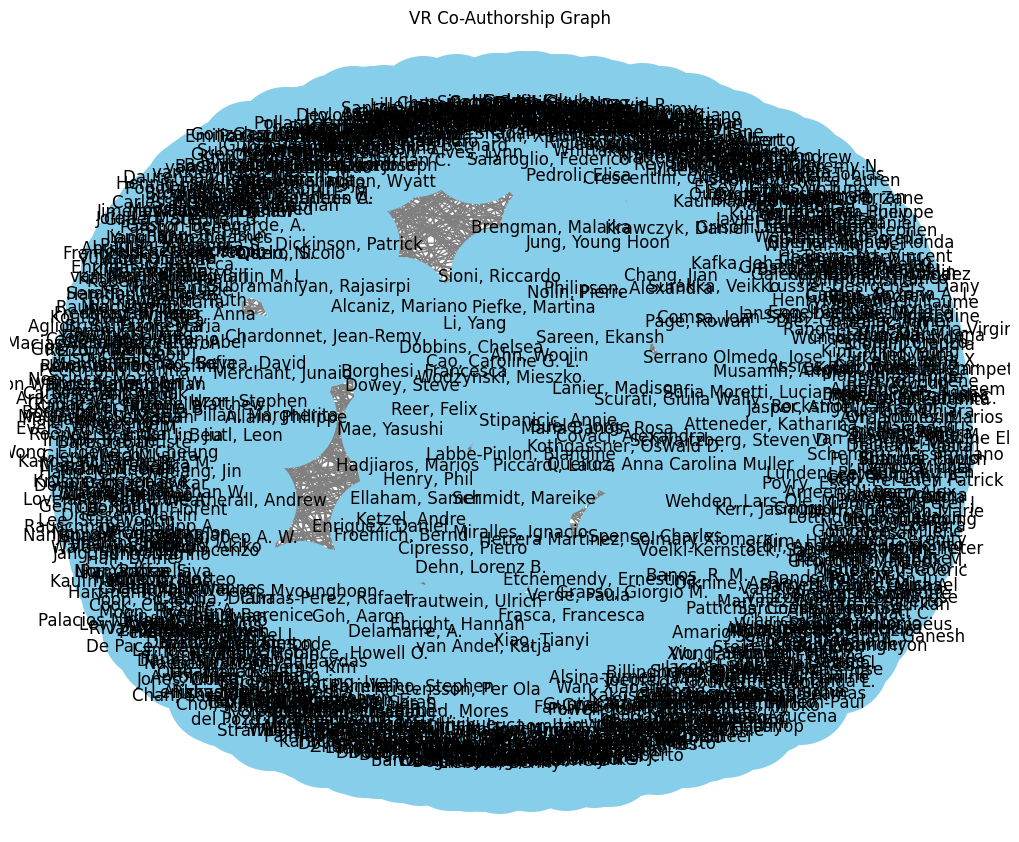

In [ ]:
#vr co-authorship
G3 = nx.Graph()

for authors in vr_df['Authors List']:
        if len(authors) > 1:
            G3.add_nodes_from(authors)
            G3.add_edges_from((authors[i], authors[j]) for i in range(len(authors)) for j in range(i + 1, len(authors)))

print(f"Number of nodes: {G3.number_of_nodes()}")
print(f"Number of edges: {G3.number_of_edges()}")
#print("Nodes:", list(G3.nodes()))
#print("Edges:", list(G3.edges()))


plt.figure(figsize=(10, 8))  

pos = nx.spring_layout(G3, k=1, iterations= 50)  
nx.draw(G3, pos, with_labels=True, node_color='skyblue', 
        node_size=5000, edge_color='gray', linewidths=2, font_size=12)


plt.title("VR Co-Authorship Graph")
plt.show()

nx.write_graphml(G3,'vr_co-authorship_graph.graphml')

Number of nodes: 739
Number of edges: 2503


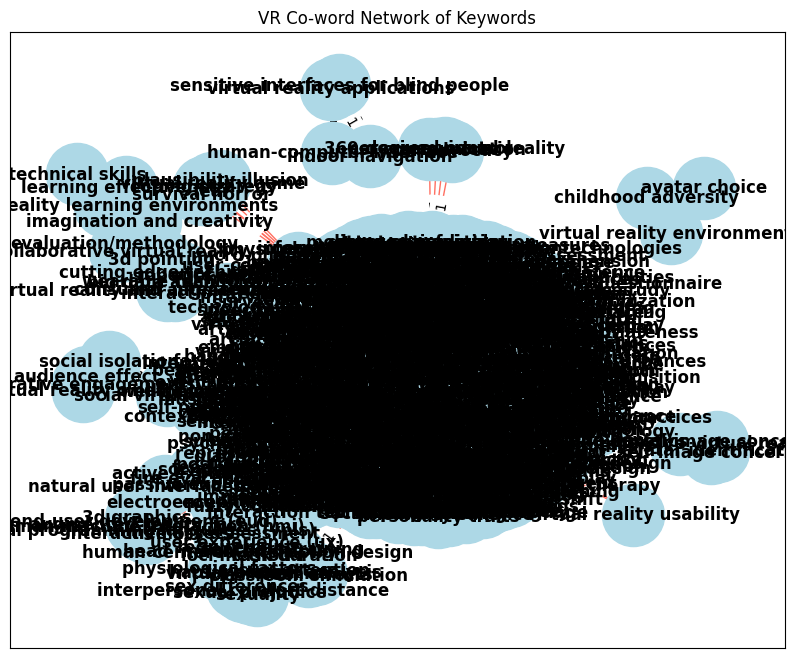

In [ ]:
#vr co-word 
G4 = nx.Graph()

for keywords in vr_df['Keywords List']:
    for (kw1, kw2) in combinations(keywords, 2):
        if G4.has_edge(kw1, kw2):
            G4[kw1][kw2]['weight'] += 1
        else:
            G4.add_edge(kw1, kw2, weight=1)

print(f"Number of nodes: {G4.number_of_nodes()}")
print(f"Number of edges: {G4.number_of_edges()}")

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G4, k=0.15,
                        iterations=50)  
nx.draw_networkx(G4, pos, node_size=2000, node_color='lightblue', with_labels=True, font_weight='bold', edge_color='#FF6F61')
labels = nx.get_edge_attributes(G4, 'weight')
nx.draw_networkx_edge_labels(G4, pos, edge_labels=labels)
plt.title('VR Co-word Network of Keywords')
plt.show()

nx.write_graphml(G4,'vr_co-keywords_graph.graphml')

def export_to_net_file(G, filename="vr_kw_network.net"):
    with open(filename, "w") as file:
        file.write(f"*Vertices {G.number_of_nodes()}\n")
        id_map = {node: i+1 for i, node in enumerate(G.nodes())}
        for node, id in id_map.items():
            file.write(f"{id} \"{node}\"\n")
        
        file.write("*Edges\n")
        for u, v, data in G.edges(data=True):
            file.write(f"{id_map[u]} {id_map[v]} {data['weight']}\n")

export_to_net_file(G4)